Le but de ce notebook est de réaliser des tests statistiques afin de déterminer si les distributions étudiées sont significativement différentes ou non.
Pour cela, nous commencerons par effectuer un test de Shapiro pour évaluer la normalité des distributions.
Si la normalité est confirmée, nous utiliserons un test de Student ; dans le cas contraire, nous appliquerons un test de Mann-Whitney.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,make_scorer, precision_score, recall_score, f1_score, accuracy_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pour lire le dataset

In [ ]:
data = pd.read_csv("../../Data/Cleaned_Dataframe.csv",sep=';')
display(data.head())

C:\Users\wendy\AppData\Local\Temp\ipykernel_28984\667430293.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\EPF S5\projet audiométrie\premier_test_methodes_analyses\Analyse_bd_final\df_final.csv",sep=';')


,ID_CLIENT,ANTECEDENT_FAMILIAUX,ACOUPHENES,DIABETE,EXPOSITION,AGE,SEXE,FREQ_250_D_THR,FREQ_250_G_THR,FREQ_250_D_UCL,...,FREQ_2000_D_UCL,FREQ_2000_G_UCL,FREQ_4000_D_THR,FREQ_4000_G_THR,FREQ_4000_D_UCL,FREQ_4000_G_UCL,FREQ_8000_D_THR,FREQ_8000_G_THR,FREQ_8000_D_UCL,FREQ_8000_G_UCL
0,1,Non,Oui,Non,Oui,55.0,H,20.0,30.0,100.0,...,110,110,60,65,110,110,NaN,NaN,NaN,NaN
1,105,Non,Oui,Non,Non,77.0,F,20.0,35.0,100.0,...,110,110,60,65,115,120,60.0,60.0,NaN,NaN
2,162,Non,Oui,Non,Non,63.0,F,25.0,30.0,85.0,...,105,105,105,100,120,115,105.0,105.0,NaN,NaN
3,345,Non,Oui,Non,Oui,65.0,F,25.0,15.0,95.0,...,100,95,15,10,90,100,40.0,35.0,90.0,85.0
4,1120,Non,Oui,Non,Oui,0.0,F,15.0,10.0,83.0,...,89,87,30,35,90,94,90.0,95.0,NaN,NaN


pour encoder les variables

In [3]:
data["ACOUPHENES"]=data["ACOUPHENES"].map({"Oui":1,"Non":0})
data["ANTECEDENT_FAMILIAUX"]=data["ANTECEDENT_FAMILIAUX"].map({"Oui":1,"Non":0})
data["DIABETE"]=data["DIABETE"].map({"Oui":1,"Non":0})
data["EXPOSITION"]=data["EXPOSITION"].map({"Oui":1,"Non":0})
data["SEXE"]=data["SEXE"].map({"H":1,"F":0})

display(data.head(5))
display(data.tail(5))

,ID_CLIENT,ANTECEDENT_FAMILIAUX,ACOUPHENES,DIABETE,EXPOSITION,AGE,SEXE,FREQ_250_D_THR,FREQ_250_G_THR,FREQ_250_D_UCL,...,FREQ_2000_D_UCL,FREQ_2000_G_UCL,FREQ_4000_D_THR,FREQ_4000_G_THR,FREQ_4000_D_UCL,FREQ_4000_G_UCL,FREQ_8000_D_THR,FREQ_8000_G_THR,FREQ_8000_D_UCL,FREQ_8000_G_UCL
0,1,0.0,1,0.0,1.0,55.0,1.0,20.0,30.0,100.0,...,110,110,60,65,110,110,NaN,NaN,NaN,NaN
1,105,0.0,1,0.0,0.0,77.0,0.0,20.0,35.0,100.0,...,110,110,60,65,115,120,60.0,60.0,NaN,NaN
2,162,0.0,1,0.0,0.0,63.0,0.0,25.0,30.0,85.0,...,105,105,105,100,120,115,105.0,105.0,NaN,NaN
3,345,0.0,1,0.0,1.0,65.0,0.0,25.0,15.0,95.0,...,100,95,15,10,90,100,40.0,35.0,90.0,85.0
4,1120,0.0,1,0.0,1.0,0.0,0.0,15.0,10.0,83.0,...,89,87,30,35,90,94,90.0,95.0,NaN,NaN


,ID_CLIENT,ANTECEDENT_FAMILIAUX,ACOUPHENES,DIABETE,EXPOSITION,AGE,SEXE,FREQ_250_D_THR,FREQ_250_G_THR,FREQ_250_D_UCL,...,FREQ_2000_D_UCL,FREQ_2000_G_UCL,FREQ_4000_D_THR,FREQ_4000_G_THR,FREQ_4000_D_UCL,FREQ_4000_G_UCL,FREQ_8000_D_THR,FREQ_8000_G_THR,FREQ_8000_D_UCL,FREQ_8000_G_UCL
62270,A7406761,1.0,0,0.0,0.0,85.0,0.0,40.0,50.0,75.0,...,85,85,65,55,95,90,50.0,60.0,85.0,95.0
62271,A7406762,1.0,1,0.0,1.0,84.0,1.0,35.0,30.0,90.0,...,110,115,105,110,0,0,95.0,95.0,NaN,NaN
62272,A7406764,1.0,0,1.0,1.0,74.0,1.0,20.0,35.0,80.0,...,105,100,85,80,110,105,65.0,70.0,95.0,95.0
62273,A7406796,0.0,1,1.0,1.0,74.0,1.0,70.0,55.0,100.0,...,95,85,85,90,100,110,90.0,95.0,NaN,NaN
62274,DUMFR663,0.0,1,1.0,0.0,71.0,1.0,15.0,45.0,NaN,...,100,110,55,85,105,120,80.0,90.0,NaN,NaN


Vérifions à présent si les distributions suivent une loi normale, afin de déterminer quel test statistique est le plus adapté pour évaluer si les groupes présentent des distributions similaires ou non.



In [4]:
group_1 = data[data['ACOUPHENES'] == 1]
group_2 = data[data['ACOUPHENES'] == 0]

from scipy.stats import shapiro, ttest_ind, mannwhitneyu

colonnes_a_tester = [col for col in data.columns if 'THR' in col or 'UCL' in col]

resultats = []

for col in colonnes_a_tester:
    x1 = data[data['ACOUPHENES'] == 1][col].dropna()
    x0 = data[data['ACOUPHENES'] == 0][col].dropna()

    # Test de normalité
    p_shapiro_1 = shapiro(x1)[1]
    p_shapiro_0 = shapiro(x0)[1]

    normal_1 = p_shapiro_1 > 0.05
    normal_0 = p_shapiro_0 > 0.05

    if normal_1 and normal_0:
        # t-test
        stat, p_value = ttest_ind(x1, x0, equal_var=False)
        test = 't-test'
    else:
        # test non paramétrique
        stat, p_value = mannwhitneyu(x1, x0, alternative='two-sided')
        test = 'Mann–Whitney'

    resultats.append({
        'Variable': col,
        'Normalité_1': normal_1,
        'Normalité_0': normal_0,
        'Test': test,
        'p-value': p_value,
        'Significatif (p<0.05)': p_value < 0.05
    })

df_resultats = pd.DataFrame(resultats)
display(df_resultats.sort_values(by='p-value'))


c:\Users\wendy\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29017.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\wendy\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33125.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\wendy\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29007.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\wendy\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33114.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\wendy\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586:

,Variable,Normalité_1,Normalité_0,Test,p-value,Significatif (p<0.05)
8,FREQ_1000_D_THR,False,False,Mann–Whitney,3.837327e-86,True
9,FREQ_1000_G_THR,False,False,Mann–Whitney,2.865992e-81,True
14,FREQ_2000_D_UCL,False,False,Mann–Whitney,1.187171e-68,True
4,FREQ_500_D_THR,False,False,Mann–Whitney,2.100055e-68,True
12,FREQ_2000_D_THR,False,False,Mann–Whitney,2.386737e-68,True
5,FREQ_500_G_THR,False,False,Mann–Whitney,4.230217e-64,True
10,FREQ_1000_D_UCL,False,False,Mann–Whitney,2.784284e-61,True
13,FREQ_2000_G_THR,False,False,Mann–Whitney,3.106298e-57,True
0,FREQ_250_D_THR,False,False,Mann–Whitney,3.522098e-53,True
15,FREQ_2000_G_UCL,False,False,Mann–Whitney,6.453318e-53,True


À la lumière des résultats obtenus, on observe que la distribution de chacune des variables n'est pas normale, comme l'indique le test de Shapiro (p-value < 0.05).
En conséquence, nous avons appliqué le test de Mann-Whitney (bilatéral), car aucune hypothèse n’est formulée sur le sens de la différence entre les groupes (par exemple, on ne suppose pas que x₁ < x₀).
Le test révèle une différence significative entre les groupes "acouphènes" et "sans acouphènes" (p-value < 0.05), ce qui suggère fortement que cette différence n’est pas due au hasard.

Exemple de distribution: fréquence à l'oreille Gauche à 1000Hz

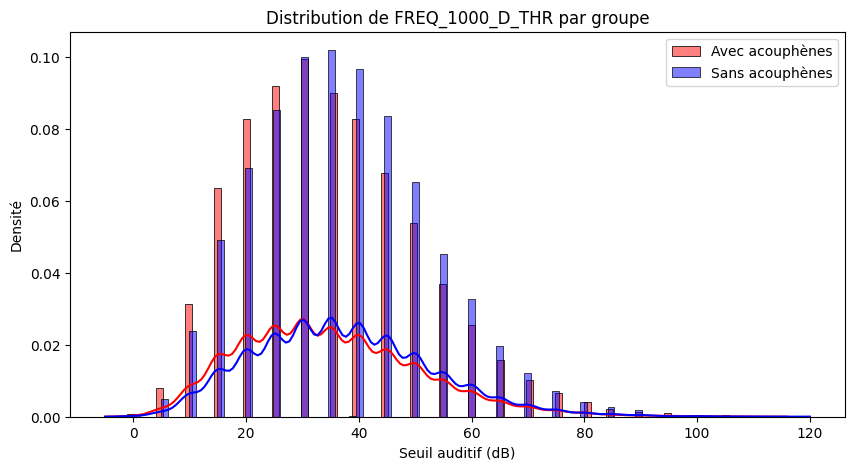

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# On sépare les deux groupes
x1 = data[data['ACOUPHENES'] == 1]['FREQ_1000_D_THR'].dropna()
x0 = data[data['ACOUPHENES'] == 0]['FREQ_1000_D_THR'].dropna()

# Histogrammes KDE pour les deux groupes
plt.figure(figsize=(10, 5))
sns.histplot(x1, color='red', label='Avec acouphènes', kde=True, stat='density')
sns.histplot(x0, color='blue', label='Sans acouphènes', kde=True, stat='density')
plt.title('Distribution de FREQ_1000_D_THR par groupe')
plt.xlabel('Seuil auditif (dB)')
plt.ylabel('Densité')
plt.legend()
plt.show()


Le graphique met en évidence une différence claire entre les distributions des seuils auditifs des groupes avec et sans acouphènes. Le groupe "avec acouphènes" présente une distribution décalée vers la droite, indiquant des seuils auditifs globalement plus élevés, donc une audition plus dégradée. À l’inverse, le groupe "sans acouphènes" est centré sur des valeurs plus faibles, avec une distribution plus resserrée. Cette observation suggère une différence significative entre les deux groupes, ce que confirment les analyses statistiques (test de Shapiro puis Mann-Whitney), renforçant l’hypothèse que la présence d’acouphènes est associée à une altération plus marquée de l’audition.


# Matrice de correlation
Étant donné que les données ne suivent pas une relation linéaire, nous avons utilisé la matrice de corrélation de Spearman.

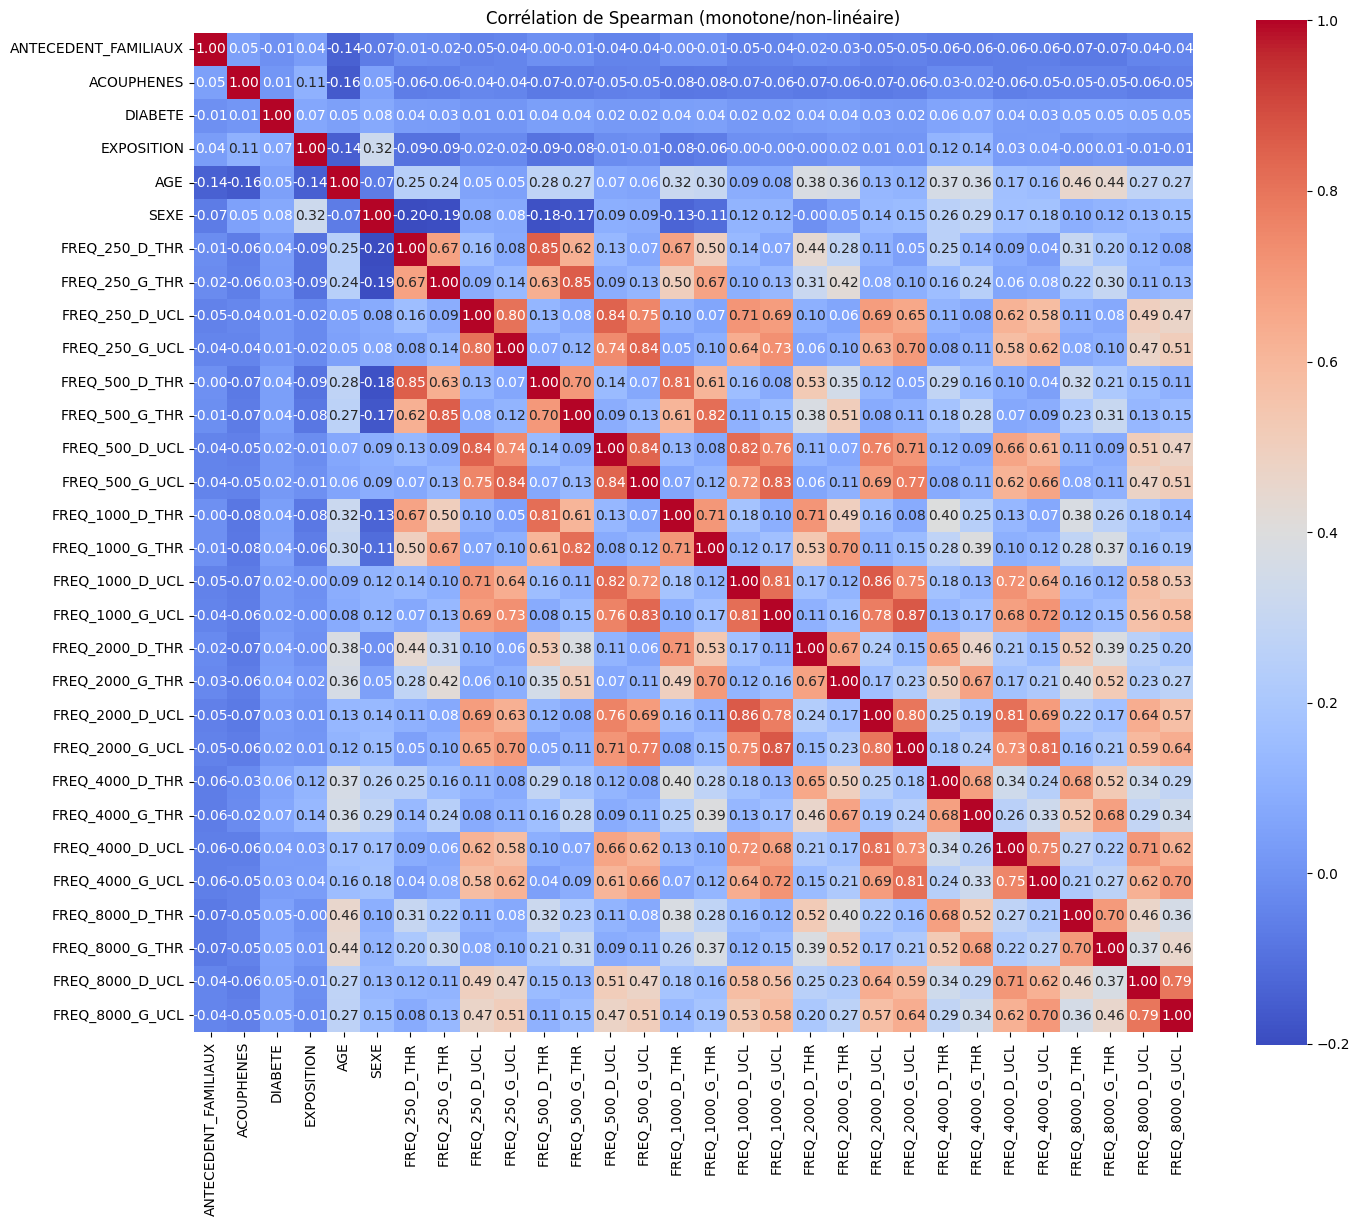


Top corrélations non linéaires avec ACOUPHENES:
ACOUPHENES              1.000000
EXPOSITION              0.108388
SEXE                    0.051520
ANTECEDENT_FAMILIAUX    0.047648
DIABETE                 0.012168
FREQ_4000_G_THR        -0.019575
FREQ_4000_D_THR        -0.025261
FREQ_250_D_UCL         -0.036406
FREQ_250_G_UCL         -0.037550
FREQ_8000_D_THR        -0.048308
FREQ_4000_G_UCL        -0.048466
FREQ_8000_G_THR        -0.049390
FREQ_500_G_UCL         -0.050370
FREQ_500_D_UCL         -0.052275
FREQ_8000_G_UCL        -0.054557
FREQ_4000_D_UCL        -0.057401
FREQ_250_G_THR         -0.058801
FREQ_1000_G_UCL        -0.060102
FREQ_8000_D_UCL        -0.060548
FREQ_2000_G_UCL        -0.061355
FREQ_250_D_THR         -0.061579
FREQ_2000_G_THR        -0.063894
FREQ_1000_D_UCL        -0.066186
FREQ_500_G_THR         -0.067737
FREQ_2000_D_THR        -0.070010
FREQ_500_D_THR         -0.070040
FREQ_2000_D_UCL        -0.070170
FREQ_1000_G_THR        -0.076512
FREQ_1000_D_THR        -0.0

In [6]:
# Corrélation de Spearman (relation monotone, même non linéaire)
corr_spearman = data.corr(method="spearman", numeric_only=True)

# Matplotlib pour visualiser
plt.figure(figsize=(14, 23))



# Spearman
plt.subplot(2, 1, 2)
sns.heatmap(corr_spearman, cmap="coolwarm", annot=True,fmt=".2f", square=True)
plt.title("Corrélation de Spearman (monotone/non-linéaire)")

plt.tight_layout()
plt.show()


print("\nTop corrélations non linéaires avec ACOUPHENES:")
print(corr_spearman["ACOUPHENES"].sort_values(ascending=False))


Les coefficients de Spearman indiquent des corrélations faibles à modérées entre les seuils auditifs et certaines variables, notamment l'âge (jusqu’à ρ ≈ 0.56) et la présence d’acouphènes (ρ ≈ 0.28–0.31).
Ces résultats suggèrent une tendance possible, mais pas une relation forte ou systématique.
En particulier, l’association entre acouphènes et dégradation auditive apparaît faible sur le plan statistique, ce qui invite à la prudence dans l’interprétation.
D'autres facteurs non mesurés (psychologiques, neurologiques, exposition chronique au bruit, etc.) pourraient jouer un rôle plus important.

